In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [2]:

df_elering = pd.read_csv('../Data_folder/da_and_fake_pred.csv', sep=';')

df_btd = pd.read_csv('../Data_folder/transp_dash_data.csv', sep=';')

df_btd_nec = pd.read_csv('../Data_folder/btd_nec.csv', sep=';')


## df_elering

In [3]:

pd.concat([df_elering.head(3), df_elering.tail(3)], ignore_index=False)


,Unnamed: 0,timestamp,DA_price,datetime,fake_pred
0,0,1672527600,2.01,2023-01-01 00:00:00,1.94
1,1,1672531200,1.38,2023-01-01 01:00:00,1.19
2,2,1672534800,0.09,2023-01-01 02:00:00,0.09
8757,8757,1704052800,53.83,2023-12-31 21:00:00,53.17
8758,8758,1704056400,55.49,2023-12-31 22:00:00,52.75
8759,8759,1704060000,40.01,2023-12-31 23:00:00,33.42


In [4]:

mean_da_price = df_elering['DA_price'].mean()
std_dev_da_price = df_elering['DA_price'].std()
min_da_price = df_elering['DA_price'].min()
max_da_price = df_elering['DA_price'].max()
median_da_price = df_elering['DA_price'].median()
quartiles_da_price = df_elering['DA_price'].quantile([0.25, 0.5, 0.75])

print(f"Mean: {mean_da_price}")
print(f"Standard Deviation: {std_dev_da_price}")
print(f"Minimum: {min_da_price}")
print(f"Maximum: {max_da_price}")
print(f"Median: {median_da_price}")
print("Quartiles:")
print(quartiles_da_price)


Mean: 90.7889703196347
Standard Deviation: 55.794674714833775
Minimum: -60.04
Maximum: 777.18
Median: 90.305
Quartiles:
0.25     49.9675
0.50     90.3050
0.75    121.3125
Name: DA_price, dtype: float64


In [5]:

df_elering


,Unnamed: 0,timestamp,DA_price,datetime,fake_pred
0,0,1672527600,2.01,2023-01-01 00:00:00,1.94
1,1,1672531200,1.38,2023-01-01 01:00:00,1.19
2,2,1672534800,0.09,2023-01-01 02:00:00,0.09
3,3,1672538400,0.08,2023-01-01 03:00:00,0.08
4,4,1672542000,0.05,2023-01-01 04:00:00,0.05
...,...,...,...,...,...
8755,8755,1704045600,59.99,2023-12-31 19:00:00,48.05
8756,8756,1704049200,40.99,2023-12-31 20:00:00,40.99
8757,8757,1704052800,53.83,2023-12-31 21:00:00,53.17
8758,8758,1704056400,55.49,2023-12-31 22:00:00,52.75


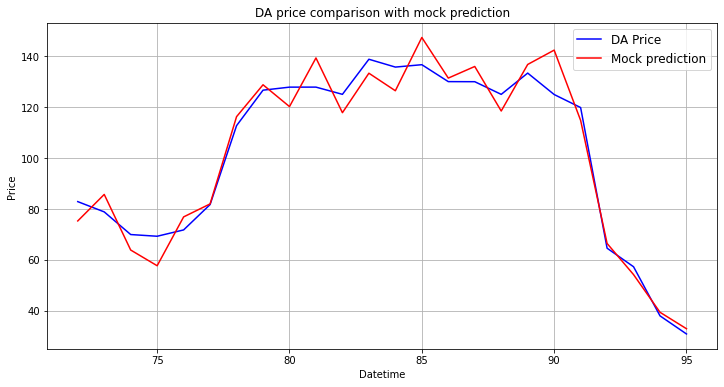

In [6]:

start, end = 72, 96

plt.figure(figsize=(12, 6))
plt.plot(df_elering['DA_price'].iloc[start:end], label='DA Price', color='blue')
plt.plot(df_elering['fake_pred'].iloc[start:end], label='Mock prediction', color='red')
plt.title('DA price comparison with mock prediction')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend(fontsize='large')
#plt.legend()
plt.grid(True)

plt.savefig('da_pred_comp.pdf')

plt.show()


# df baltic transparency dashboard

In [7]:

pd.concat([df_btd.head(3), df_btd.tail(3)], ignore_index=False)


,datetime,mfrr_act_baltics_upward,mfrr_act_baltics_downward,mfrr_act_estonia_upward,mfrr_act_estonia_downward,mfrr_act_latvia_upward,mfrr_act_latvia_downward,mfrr_act_lithuania_upward,mfrr_act_lithuania_downward,mfrr_act_finland_upward,...,balancing_p_latvia_downward,balancing_p_lithuania_upward,balancing_p_lithuania_downward,imbalance_vol_baltics_none,imbalance_vol_estonia_none,imbalance_vol_latvia_none,imbalance_vol_lithuania_none,imbalance_p_estonia_none,imbalance_p_latvia_none,imbalance_p_lithuania_none
0,2023-01-01 00:00:00,0.000,29.767,0.000,0.0,0.0,0.0,0.0,29.767,0.0,...,-321.00,-321.00,-321.00,145.652,16.096,-0.939,130.495,-309.49,-309.49,-309.49
1,2023-01-01 01:00:00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,-6.72,-6.72,-6.72,95.722,-37.693,12.697,120.718,4.79,4.79,4.79
2,2023-01-01 02:00:00,0.000,73.333,0.000,0.0,0.0,0.0,0.0,73.333,0.0,...,-321.00,-321.00,-321.00,211.622,67.414,-12.370,156.578,-309.49,-309.49,-309.49
8761,2024-01-01 01:00:00,52.000,0.000,42.000,0.0,0.0,0.0,10.0,0.000,0.0,...,200.00,200.00,200.00,-20.618,-3.279,-24.281,6.942,189.03,189.03,189.03
8762,2024-01-01 02:00:00,26.666,0.000,26.666,0.0,0.0,0.0,0.0,0.000,0.0,...,129.00,129.00,129.00,-18.603,-8.673,-24.337,14.407,118.03,118.03,118.03
8763,2024-01-01 03:00:00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,30.00,30.00,30.00,29.608,11.248,11.192,7.168,40.97,40.97,40.97


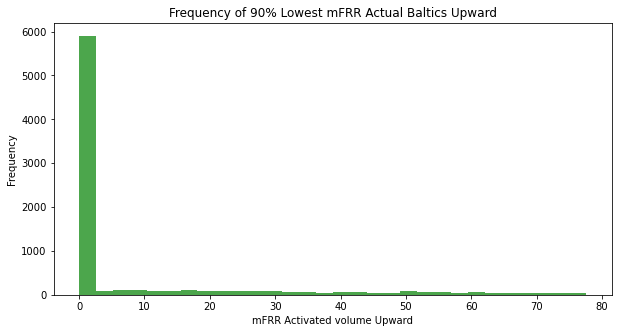

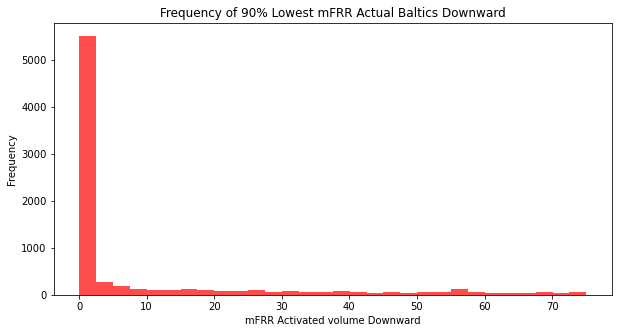

In [8]:

upward_90th_percentile = df_btd['mfrr_act_baltics_upward'].quantile(0.9)

filtered_upward = df_btd[df_btd['mfrr_act_baltics_upward'] <= upward_90th_percentile]['mfrr_act_baltics_upward']

plt.figure(figsize=(10, 5))
plt.hist(filtered_upward, bins=30, color='green', alpha=0.7)
plt.title('Frequency of 90% Lowest mFRR Actual Baltics Upward')
plt.xlabel('mFRR Activated volume Upward')
plt.ylabel('Frequency')

plt.savefig('Upward_volume.pdf')

plt.show()

downward_90th_percentile = df_btd['mfrr_act_baltics_downward'].quantile(0.9)

filtered_downward = df_btd[df_btd['mfrr_act_baltics_downward'] <= downward_90th_percentile]['mfrr_act_baltics_downward']

plt.figure(figsize=(10, 5))
plt.hist(filtered_downward, bins=30, color='red', alpha=0.7)
plt.title('Frequency of 90% Lowest mFRR Actual Baltics Downward')
plt.xlabel('mFRR Activated volume Downward')
plt.ylabel('Frequency')

plt.savefig('Downward_volume.pdf')

plt.show()


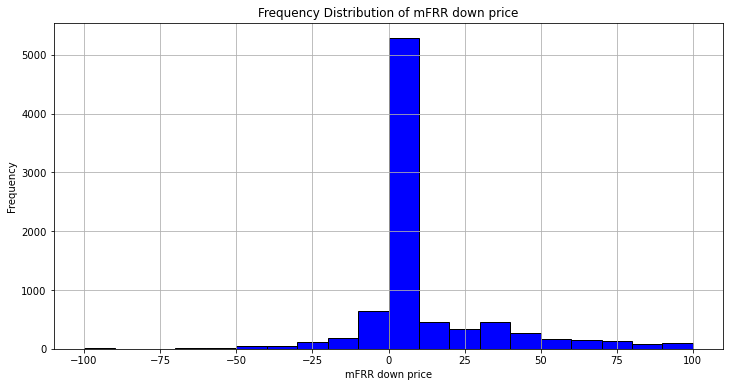

In [9]:

bin_edges = range(-100, 110, 10)  

plt.figure(figsize=(12, 6))
plt.hist(df_btd_nec['mfrr_price_approx_downward'], bins=bin_edges, range=(-100, 100), color='blue', edgecolor='black')
plt.title('Frequency Distribution of mFRR down price')
plt.xlabel('mFRR down price')
plt.ylabel('Frequency')
plt.grid(True)

plt.savefig('mfrr_down_freq_distr.pdf')

plt.show()


In [10]:
mean_value = {}
mean_value['mfrr_price_approx_upward'] = np.mean(df_btd['mfrr_price_approx_upward'])
mean_value['mfrr_price_approx_downward'] = np.mean(df_btd['mfrr_price_approx_downward'])

def noisify_with_mae(start, periods):
    np.random.seed(13)
    df = df_btd_nec.copy()
    
    columns_to_modify = [
        'mfrr_price_approx_upward', 
        'mfrr_price_approx_downward',
    ]

    mae_values = [28, 40, 49 , 55 , 63, 69 , 73, 76]  # Real MAE values
    df_noisy = pd.DataFrame()
    
    for column in columns_to_modify:
        values = df[column].iloc[start:start+periods]
        mean = mean_value[column]
        noisy_values = [value + mae * np.random.choice([-1, 1]) * np.random.normal(1, 1)
                        for value, mae in zip(values, mae_values)]
        df_noisy[column] = noisy_values

    df_noisy['imbalance_p'] = list(df['imbalance_p_estonia_none'].iloc[start:start+periods])
    df_noisy['real_up'] = list(df['mfrr_price_approx_upward'].iloc[start:start+periods])
    df_noisy['real_down'] = list(df['mfrr_price_approx_downward'].iloc[start:start+periods])
    df_noisy['mfrr_act_baltics_downward'] = list(df['mfrr_act_baltics_downward'].iloc[start:start+periods])
    df_noisy['mfrr_act_baltics_upward'] = list(df['mfrr_act_baltics_upward'].iloc[start:start+periods])
    
    return df_noisy

print(mean_value)


try_data_df = noisify_with_mae(275, 8)

try_data_df

KeyError: 'mfrr_price_approx_upward'

In [ ]:

plt.figure(figsize=(12, 6)) 
plt.plot(try_data_df['mfrr_price_approx_downward'], label='mFRR Down Price mock prediction')
plt.plot(try_data_df['real_down'], label='mFRR Down Price')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.title('Comparison of mFRR down mock predictions and real prices')
plt.legend(fontsize='large')
plt.grid(True)

plt.savefig('comp_mfrr_real_mock.pdf')

plt.show()
